# Naïve Bayes

In [16]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB

## Base Risco de Crédito

In [4]:
base_risco_credito = pd.read_csv('/content/drive/MyDrive/ML_datasets/risco_credito.csv')

In [5]:
base_risco_credito


,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [7]:
X_risco_credito = base_risco_credito.iloc[:, 0:4].values #values transforma isso em um array que o pandas reconheça. Esses são os dados previsores, o 4 não conta.
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [8]:
Y_risco_credito = base_risco_credito.iloc[:, 4].values
Y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [10]:
#para que o algorítmo de Bayes (e outros também) possam fazer a multiplicação, temos que usar um encoder para transformas os dados que estão em string para number.
from sklearn.preprocessing import LabelEncoder
#teremos que instanciar o LabelEncoder para cada atributo categórico.
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantias = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [12]:
X_risco_credito[:, 0] = label_encoder_historia.fit_transform(X_risco_credito[:, 0])
X_risco_credito[:, 1] = label_encoder_divida.fit_transform(X_risco_credito[:, 1])
X_risco_credito[:, 2] = label_encoder_garantias.fit_transform(X_risco_credito[:, 2])
X_risco_credito[:, 3] = label_encoder_renda.fit_transform(X_risco_credito[:, 3])

In [13]:
X_risco_credito #perceba que na primeira coluna, o 'ruim' passa a ser o valor 2, o 'desconhecido', o valor 1 e assim por diante.

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [14]:
import pickle #salvamos a base com todos os tratamentos aplicados com o pickle, que irá criar um arquivo pkl.
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([X_risco_credito, Y_risco_credito], f)

In [17]:
naive_risco_credito = GaussianNB() #gaussian é uma distribuição estatística muito comum.
naive_risco_credito.fit(X_risco_credito, Y_risco_credito) #os dados serão encaixados nessa distribuição usando o fit

GaussianNB()

In [ ]:
#Imaginamos que tenha chegado um novo registro, vamos usar o predict para fazer as previsões desse novo registro, vamos associar os atributos com a correção feita pelo LabelEncoder()
#Caso 1: historia boa (0), divida alta (0), garantias nenhuma (1), renda > 35 (2)
#Caso 2: historia ruim (2), divida alta (0), garantias adequada (0), renda < 15 (0)
#Pegando esses dados, vamos adicioná-los no predict

In [19]:
#com os dados da tabela distribuidos usando o GaussianNB, podemos começar as previsões
previsao = naive_risco_credito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])

In [20]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [23]:
naive_risco_credito.classes_ #as classes reconhecidas no algorítmo

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [26]:
naive_risco_credito.class_count_ #aqui nos informa a contagem de registros que temos para cada classe. Nesse caso, temos 6 números 'alto' e por aí vai...

array([6., 5., 3.])

In [27]:
naive_risco_credito.class_prior_ #retorna a quantidade de registros em cada classes por porcentagem. Os 6 registros do alto compreendem 42% do banco.

array([0.42857143, 0.35714286, 0.21428571])

## Base credit data

In [28]:
# usando o arquivo pkl que contém os dados já tratados.
with open('credit.pkl', 'rb') as f:#rb = read, para fazer a leitura do arquivo.
  X_credit_treinamento, Y_credit_treinamento, X_credit_teste, Y_credit_teste = pickle.load(f)

In [30]:
X_credit_treinamento.shape, Y_credit_treinamento.shape #quantidade de registros no banco

((1500, 3), (1500,))

In [31]:
 X_credit_teste.shape, Y_credit_teste.shape #conjunto de treinamento

((500, 3), (500,))

In [32]:
naive_credit_data = GaussianNB()
naive_credit_data.fit(X_credit_treinamento, Y_credit_treinamento)

GaussianNB()

In [36]:
naive_credit_data.classes_

array([0, 1])

In [37]:
previsoes = naive_credit_data.predict(X_credit_teste)

In [38]:
previsoes #Aqui, a primeira pessoa é classificada como 1, o que significa que ela não pagou o imposto.

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [41]:
accuracy_score(Y_credit_teste, previsoes) # retorna o acurácia do modelo, enviamos os dados de testes e as previsões.

0.938

In [47]:
confusion_matrix(Y_credit_teste, previsoes)

array([[428,   8],
       [ 23,  41]])

In [49]:
from yellowbrick.classifier import ConfusionMatrix

0.938

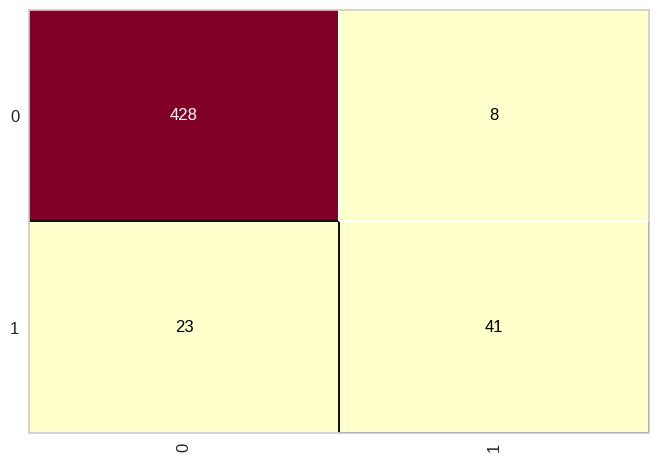

In [51]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, Y_credit_treinamento)
cm.score(X_credit_teste, Y_credit_teste)

In [55]:
from yellowbrick.classifier.classification_report import classification_report

In [59]:
print(classification_report(Y_credit_teste, previsoes))

TypeError: ignored